In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
sns.set()


from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans



# Load data

In [2]:
data= pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data= data.drop(['id'], axis= 1) # dropping id-column 

In [4]:
data= data.dropna()   # dropping Nan values 

# Group by work type 

In [5]:
data['work_type'].unique()   # unique work types 

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [6]:
data_without_chidren=data[data['work_type']!='children'] # removing children, since we are interested in working adults 

In [7]:
data_without_chidren['work_type'].unique() 

array(['Private', 'Self-employed', 'Govt_job', 'Never_worked'],
      dtype=object)

We have four work types: Private, Self-employed, government worker and never worked. 

We divide the groups into different tables 

In [8]:
private= data_without_chidren[data_without_chidren['work_type']=='Private']
self_empl= data_without_chidren[data_without_chidren['work_type']=='Self-employed']
govt_job= data_without_chidren[data_without_chidren['work_type']=='Govt_job']
never_worked= data_without_chidren[data_without_chidren['work_type']=='Never_worked']

# Private employees 


In [9]:
private.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000,2811.000000
mean,45.203842,0.090715,0.049449,105.660996,30.304625,0.045180
std,18.364985,0.287255,0.216841,44.779327,7.582663,0.207735
min,8.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,30.000000,0.000000,0.000000,77.560000,25.100000,0.000000
50%,45.000000,0.000000,0.000000,91.680000,28.900000,0.000000
75%,59.000000,0.000000,0.000000,113.645000,34.050000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Goverment employees



In [10]:
govt_job.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,50.717460,0.106349,0.052381,107.356825,30.522063,0.044444
std,15.300057,0.308529,0.222971,47.410206,6.919375,0.206244
min,14.000000,0.000000,0.000000,55.270000,16.000000,0.000000
25%,40.000000,0.000000,0.000000,76.590000,25.500000,0.000000
50%,51.000000,0.000000,0.000000,91.665000,29.400000,0.000000
75%,62.000000,0.000000,0.000000,114.030000,34.375000,0.000000
max,82.000000,1.000000,1.000000,266.590000,57.700000,1.000000


# Self-employed 

In [11]:
self_empl.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,59.916129,0.166452,0.090323,112.389161,30.211871,0.068387
std,17.003554,0.372726,0.286828,51.421671,6.687689,0.252572
min,7.000000,0.000000,0.000000,55.230000,11.300000,0.000000
25%,48.000000,0.000000,0.000000,76.605000,25.800000,0.000000
50%,62.000000,0.000000,0.000000,93.610000,29.400000,0.000000
75%,75.000000,0.000000,0.000000,124.990000,33.700000,0.000000
max,82.000000,1.000000,1.000000,267.610000,64.800000,1.000000


# Never worked 

In [12]:
never_worked.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,22.000000,22.0,22.0,22.000000,22.000000,22.0
mean,16.181818,0.0,0.0,96.042727,25.545455,0.0
std,2.342899,0.0,0.0,28.697132,7.441757,0.0
min,13.000000,0.0,0.0,59.990000,14.600000,0.0
25%,14.250000,0.0,0.0,78.457500,20.975000,0.0
50%,16.000000,0.0,0.0,86.020000,23.150000,0.0
75%,17.000000,0.0,0.0,112.807500,28.350000,0.0
max,23.000000,0.0,0.0,161.280000,44.900000,0.0


We note that minimum and maximum age of "Never worked" group is the age range for teenagers and students. 

# Summary of all 

## The age of employees 

In [13]:
# create table for mean age for each work types 
age_mean= data_without_chidren.groupby(['work_type']).mean().loc[:, 'age':'age']
age_mean

,age
work_type,
Govt_job,50.717460
Never_worked,16.181818
Private,45.203842
Self-employed,59.916129


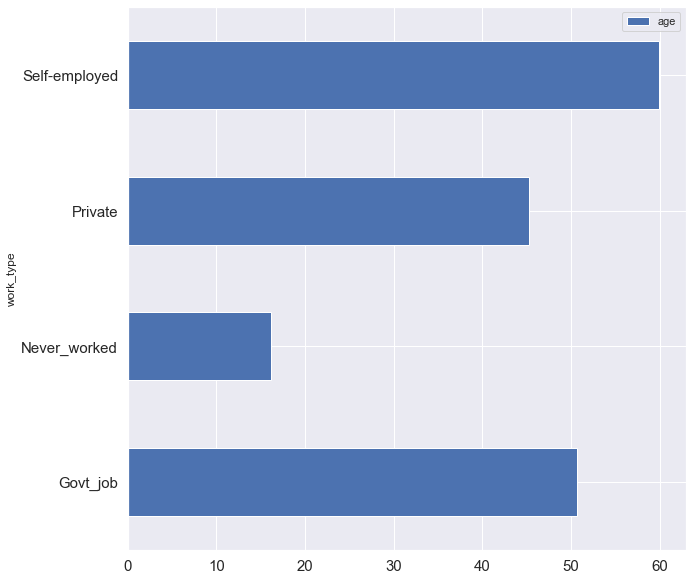

In [14]:
age_mean.plot.barh(figsize=(10,10), fontsize= 15)

plt.legend()

Seems like self-employed people are older in this sample. And never-worked group has many young people (age range 13–23). 

In [15]:
data_without_chidren.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'Never_worked'],
      dtype=object)

<AxesSubplot:xlabel='age'>

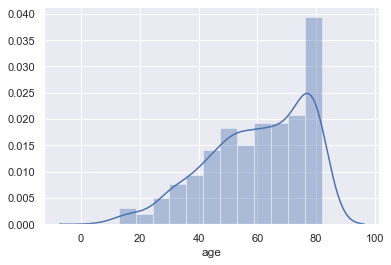

In [16]:
sns.distplot(data_without_chidren[data_without_chidren['work_type']=='Self-employed'].age )

<AxesSubplot:xlabel='age'>

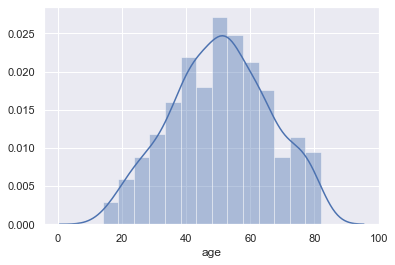

In [17]:
sns.distplot(data_without_chidren[data_without_chidren['work_type']=='Govt_job'].age )

<AxesSubplot:xlabel='age'>

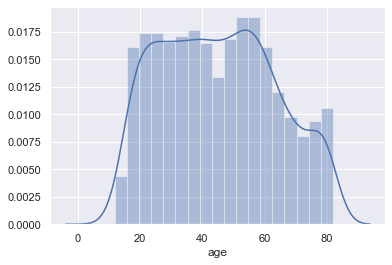

In [18]:
sns.distplot(data_without_chidren[data_without_chidren['work_type']=='Private'].age )

<AxesSubplot:xlabel='age'>

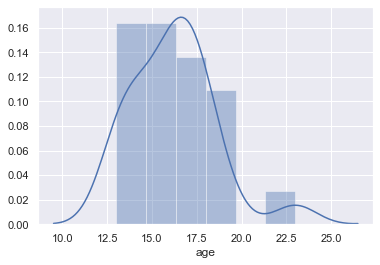

In [19]:
sns.distplot(data_without_chidren[data_without_chidren['work_type']=='Never_worked'].age )

## Hypertension 

In [20]:
# create table for mean hypertension for each work types 
hypertension_mean = data_without_chidren.groupby(['work_type']).mean().loc[:, 'hypertension':'hypertension']
hypertension_mean

,hypertension
work_type,
Govt_job,0.106349
Never_worked,0.000000
Private,0.090715
Self-employed,0.166452


<AxesSubplot:ylabel='work_type'>

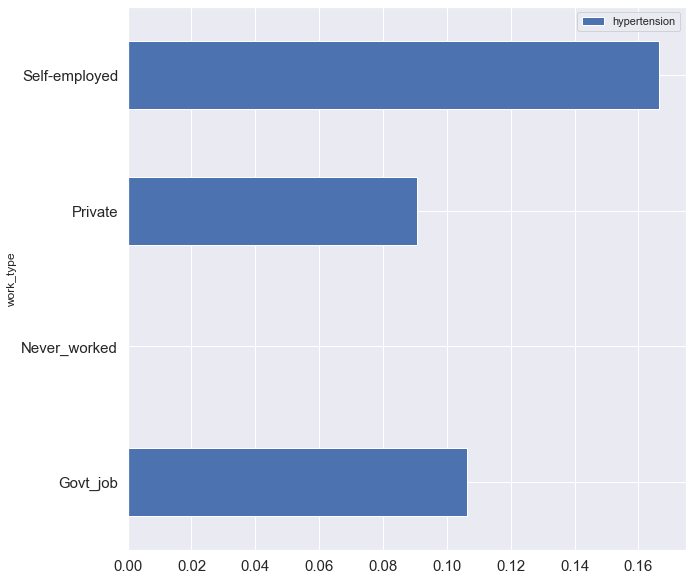

In [21]:
hypertension_mean.plot.barh(figsize=(10,10), fontsize= 15)

We check if the self-employed have significantly greater risk of getting hypertension

### Hypothesis testing 

Hypotheses: 

$H_0$: $\mu_s-\mu_0\leq 0 $ (mean of hypertension of the self-employed is smaller or equal to that of the other work type groups)

$H_1$:  $\mu_s>\mu_0\rightarrow \mu_s-\mu_0>0 $ (mean of hypertension of the self-employed is greater than that of the other work type groups)



When comparing the mean hypertension of the self-employed to the other groups, there are essentially two populations one at a time. The population variance of hypertension is unknown, but we assume them to be equal. We use the following formulae for computing t-static and its respective p-value: 
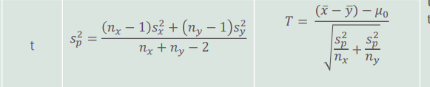

In [22]:
x_bar= hypertension_mean.loc['Self-employed', 'hypertension']
x_bar 

0.1664516129032258

In [23]:
y_bar = hypertension_mean        # all mean hypertension values 
y_bar

,hypertension
work_type,
Govt_job,0.106349
Never_worked,0.000000
Private,0.090715
Self-employed,0.166452


In [24]:
n_x= len(self_empl) # number of observations in self-employed group 
n_y =data_without_chidren.groupby(['work_type']).count()['gender'] # number of observations in all work types 


s_x2= data_without_chidren.groupby(['work_type']).var()['hypertension']['Self-employed']    # sample variance of the self-employed 
s_y2= data_without_chidren.groupby(['work_type']).var()['hypertension']     # sample variance of all groups 



In [25]:
# computing pooled variance 

def pooled_variance(n_x, n_y, s_x2, s_y2):
    '''computing pooled variance'''
    # s_x2 and s_y2 can be both arrays
    
    numerator= (n_x-1)*s_x2+ (n_y-1)*s_y2 
    denominator= n_x+n_y-2 
    
    return numerator/denominator 

s_p2= pooled_variance(n_x, n_y, s_x2, s_y2)
s_p2

work_type
Govt_job         0.119317
Never_worked     0.135255
Private          0.094697
Self-employed    0.138925
dtype: float64

In [26]:
# computing T static 

def T_statistic_for_two_unknown(x_bar, y_bar,n_x, n_y , mu_0, s_p2): 
    # x_bar: mean of sample x
    # y_bar: mean of sample y 
    # mu_0: hypothesized mean 
    # n_x: number of observations in sample x
    # n_y: number of observations in sample y
    import numpy as np
    
    numerator= (x_bar- y_bar)- mu_0
    denominator= np.sqrt(s_p2/n_x+ s_p2/n_y)
    return numerator/denominator


T_static= T_statistic_for_two_unknown(x_bar, y_bar.values[: ,-1],n_x, n_y, 0, s_p2.values)
T_static

work_type
Govt_job         3.243567
Never_worked     2.093362
Private          6.066145
Self-employed    0.000000
Name: gender, dtype: float64

In [27]:
df= n_x+n_y-2
df

work_type
Govt_job         1403
Never_worked      795
Private          3584
Self-employed    1548
Name: gender, dtype: int64

In [28]:
import scipy.stats 

# find p-value 
p_values= scipy.stats.t.sf(T_static, df= df) # p-values 
p_values.round(3) 

array([0.001, 0.018, 0.   , 0.5  ])

We construct a summary table based on p-values: 


In [29]:
p_value_summary= pd.DataFrame( p_values.round(3), index= df.index.values, columns=['p-values']) 
p_value_summary

,p-values
Govt_job,0.001
Never_worked,0.018
Private,0.000
Self-employed,0.500


We reject the null hypothesis except for the "Never worked" group: **The self-employed are more likely to develop hypertension than the government and private employees.**

## Heart disease 

In [30]:
# create table for mean heart_disease for each work types 
heart_disease_mean = data_without_chidren.groupby(['work_type']).mean().loc[:, 'heart_disease':'heart_disease']
heart_disease_mean

,heart_disease
work_type,
Govt_job,0.052381
Never_worked,0.000000
Private,0.049449
Self-employed,0.090323


Again self-employed are higher at risk in getting heart disease. We check if this is significant reusing the previous code in hypothesis testing. We make same hypothesis assumptions 

In [31]:
x_bar= heart_disease_mean.loc['Self-employed', 'heart_disease'] # the mean risk of getting heart disease of the self-employed
y_bar = heart_disease_mean                                    # the mean risk of getting heart disease of across all work types 

In [32]:
n_x= len(self_empl) # number of observations in self-employed group 
n_y =data_without_chidren.groupby(['work_type']).count()['gender'] # number of observations in all work types 


s_x2= data_without_chidren.groupby(['work_type']).var()['heart_disease']['Self-employed']    # sample variance of the self-employed 
s_y2= data_without_chidren.groupby(['work_type']).var()['heart_disease']     # sample variance of all groups 

s_p2= pooled_variance(n_x, n_y, s_x2, s_y2)   # computing pooled variance


In [33]:
T_static= T_statistic_for_two_unknown(x_bar, y_bar.values[: ,-1],n_x, n_y, 0, s_p2.values) # computing t-static 
T_static

work_type
Govt_job         2.718835
Never_worked     1.476115
Private          4.310189
Self-employed    0.000000
Name: gender, dtype: float64

In [34]:
df= n_x+n_y-2 # degrees of freedom



In [35]:
import scipy.stats 

# find p-value 
p_values= scipy.stats.t.sf(T_static, df= df) # p-values 
p_values.round(3) 

array([0.003, 0.07 , 0.   , 0.5  ])

In [36]:
p_value_summary= pd.DataFrame( p_values.round(3), index= df.index.values, columns=['p-values']) 
p_value_summary

,p-values
Govt_job,0.003
Never_worked,0.070
Private,0.000
Self-employed,0.500


We find that p-values of government and private employees are smaller than 0.05, thus, we conclude that the self-employed are significantly at higher risk of getting heart disease than private and government employees. 

## Marriage 

In [37]:
data_without_chidren['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
data_marriandwork= data_without_chidren[['ever_married', 'work_type']] # extracting marriage and work type column b
data_marriandwork

,ever_married,work_type
0,Yes,Private
2,Yes,Private
3,Yes,Private
4,Yes,Self-employed
5,Yes,Private
...,...,...
5103,No,Private
5106,Yes,Self-employed
5107,Yes,Self-employed
5108,Yes,Private


In [39]:
data_marriandwork['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'Never_worked'],
      dtype=object)

In [40]:
private= data_marriandwork[data_marriandwork['work_type']== 'Private']
self_employed= data_marriandwork[data_marriandwork['work_type']== 'Self-employed'] 
govt_job = data_marriandwork[data_marriandwork['work_type']=='Govt_job'] 
never_worked= data_marriandwork[data_marriandwork['work_type']== 'Never_worked'] 


### Checking the ratio of married and not married

We now make a pie chart and visualize the ratio within the same work type: 

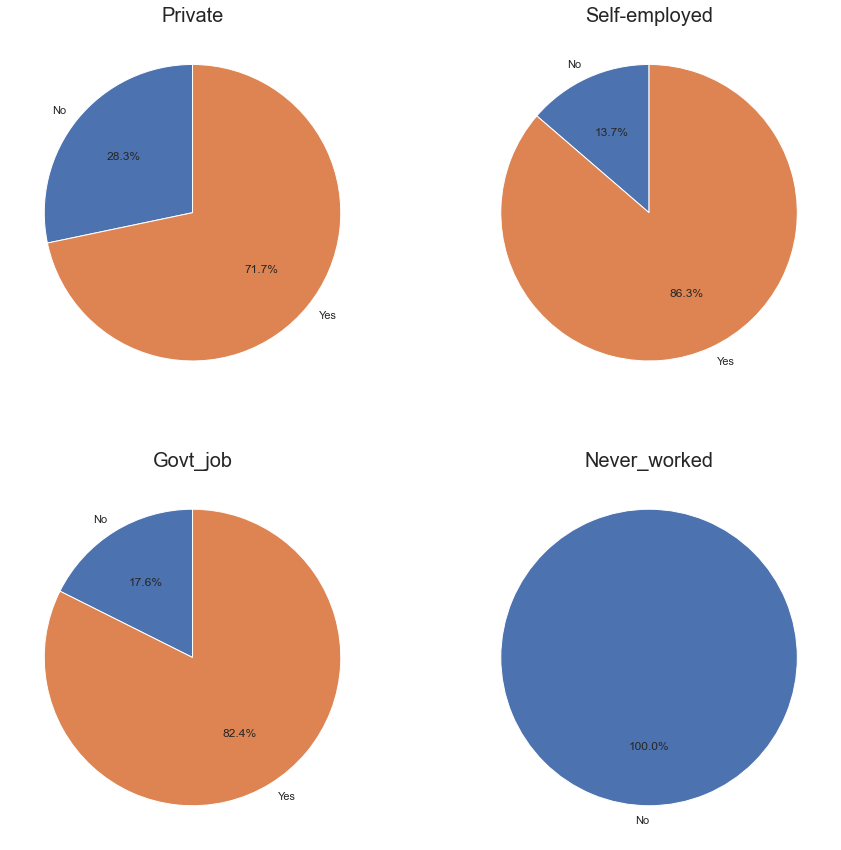

In [41]:
plotlist= [private, self_employed, govt_job, never_worked] # list of dataframe of work types with their marriage status
                                                            # ubsed make a pie plot 

fig, ax= plt.subplots(2,2, figsize=(15, 15))    

row=0  # for subplots' row
column= 0  # for subplots' column
for work in plotlist: 
    values= work.groupby('ever_married').count().values.reshape(-1)  # counts of marriage status: e.g. Yes: 10 , No: 20 
    labels= work.groupby('ever_married').count().index.values       # index labels for labelling in pie chart: Yes/No
    ax[row, column ].pie(values, labels= labels, startangle=90, autopct='%1.1f%%')
    ax[row, column ].set_title(work.iloc[0, -1], fontsize= 20)
    
    
    if column==1: 
        row = 1 
        column=0 
    else: 
        column+=1 
    
      



Findings: 
- The self-employed group has highest relative frequency of married people 
- Within the never worked group, there is no married person. 
- Among the working group, the private employees have least relative frequency of married people. 

## Residence type 

We reuse the code used in Marriage section to analyze the proportional counts of people living in urban and rural area. 

In [42]:
data_without_chidren['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [43]:
data_residenceandwork= data_without_chidren[['Residence_type', 'work_type']] # extracting marriage and work type column b
data_residenceandwork

,Residence_type,work_type
0,Urban,Private
2,Rural,Private
3,Urban,Private
4,Rural,Self-employed
5,Urban,Private
...,...,...
5103,Urban,Private
5106,Urban,Self-employed
5107,Rural,Self-employed
5108,Rural,Private


In [44]:
data_residenceandwork['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'Never_worked'],
      dtype=object)

In [45]:
private= data_residenceandwork[data_residenceandwork['work_type']== 'Private']
self_employed= data_residenceandwork[data_residenceandwork['work_type']== 'Self-employed'] 
govt_job = data_residenceandwork[data_residenceandwork['work_type']=='Govt_job'] 
never_worked= data_residenceandwork[data_residenceandwork['work_type']== 'Never_worked'] 

### Checking the ratio of people living in urban and rural area 

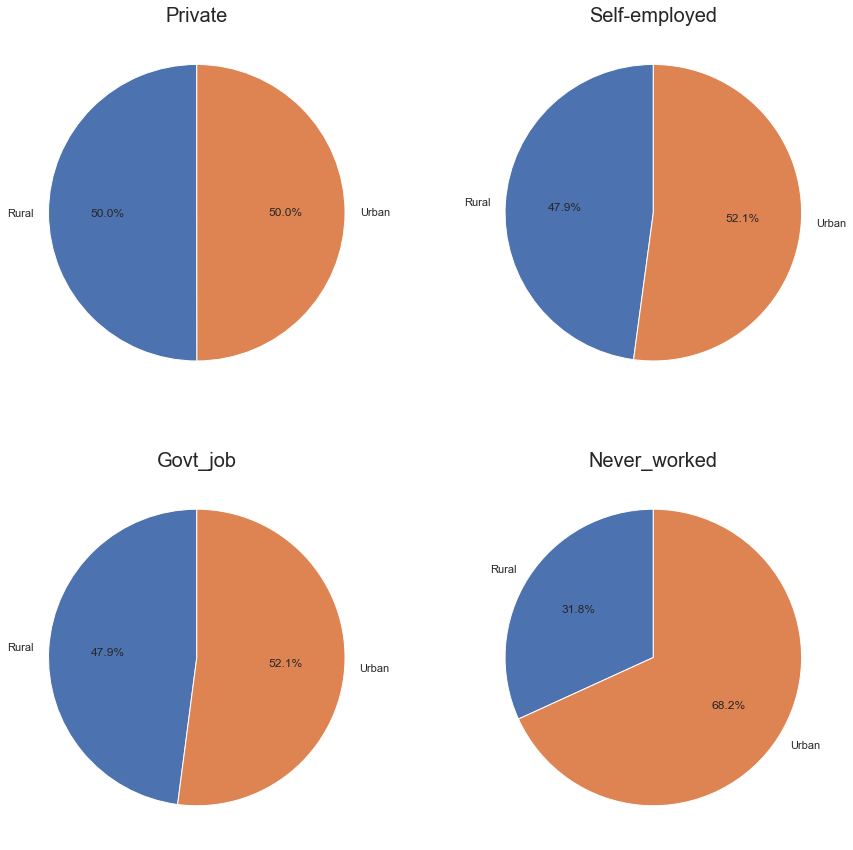

In [46]:
plotlist= [private, self_employed, govt_job, never_worked] # list of dataframe of work types with their marriage status


fig, ax= plt.subplots(2,2, figsize=(15, 15))    

row=0  # for subplots' row
column= 0  # for subplots' column
for work in plotlist: 
    values= work.groupby('Residence_type').count().values.reshape(-1)  # counts of marriage status: e.g. Yes: 10 , No: 20 
    labels= work.groupby('Residence_type').count().index.values       # index labels for labelling in pie chart: Yes/No
    ax[row, column ].pie(values, labels= labels, startangle=90, autopct='%1.1f%%')
    ax[row, column ].set_title(work.iloc[0, -1], fontsize= 20)
    
    
    if column==1: 
        row = 1 
        column=0 
    else: 
        column+=1 


Findings: 
- Among working groups, within government employees and the self-employed, there is a slight majority of urban residents. 
- Within the group of private employees, it is excatly 1:1 ratio of urban and rural residents. 
- Never worked people live mostly in urban area. 

## Average blood glucose 

In [47]:
data_bmiandwork= data_without_chidren[['avg_glucose_level', 'work_type']] # extracting average glucose level and work type column b
data_bmiandwork

,avg_glucose_level,work_type
0,228.69,Private
2,105.92,Private
3,171.23,Private
4,174.12,Self-employed
5,186.21,Private
...,...,...
5103,82.85,Private
5106,125.20,Self-employed
5107,82.99,Self-employed
5108,166.29,Private


In [48]:
# separating different work types 

private= data_bmiandwork[data_bmiandwork['work_type']== 'Private']
self_employed= data_bmiandwork[data_bmiandwork['work_type']== 'Self-employed'] 
govt_job = data_bmiandwork[data_bmiandwork['work_type']=='Govt_job'] 
never_worked= data_bmiandwork[data_bmiandwork['work_type']== 'Never_worked'] 

### Density plot

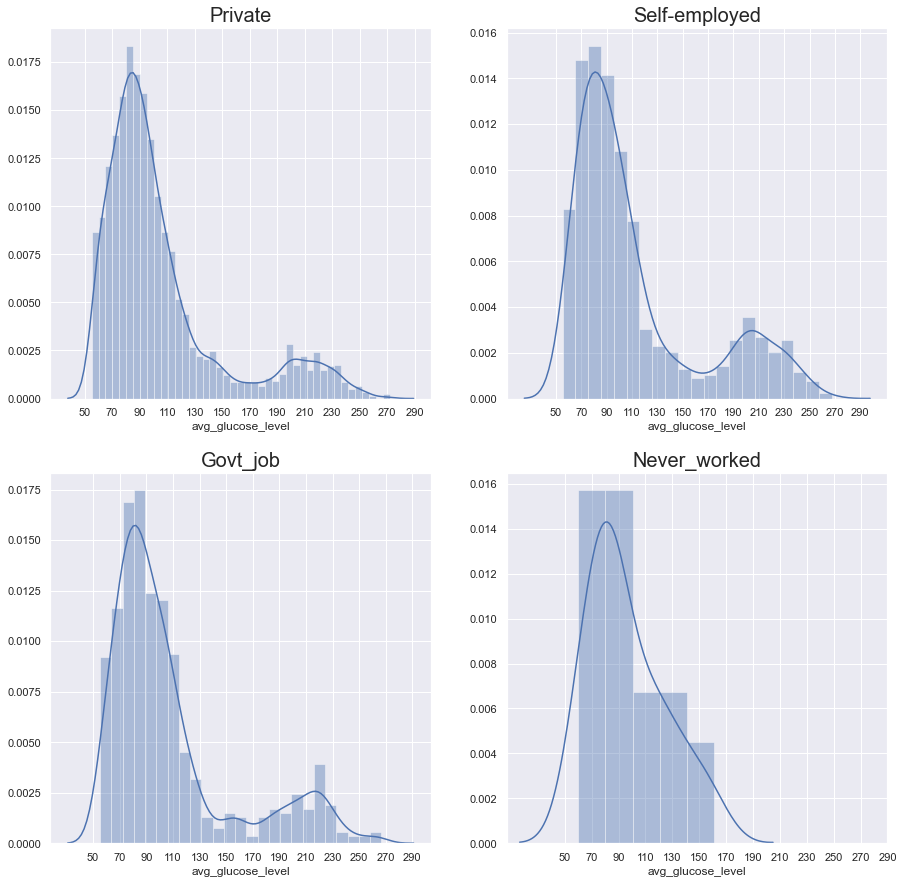

In [49]:
plotlist= [private, self_employed, govt_job, never_worked] # make a list of previously defined dataframes for making a subplot 


fig, ax= plt.subplots(2,2, figsize=(15, 15))    

row=0  # for subplots' row
column= 0  # for subplots' column
for work in plotlist: 
    sns.distplot(work.iloc[:, 0], ax= ax[row, column])
    ax[row, column ].set_title(work.iloc[0, -1], fontsize= 20)
    ax[row, column].set_xticks(np.arange(50, 300, 20))
    
    if column==1: 
        row = 1 
        column=0 
    else: 
        column+=1 

Findings: 
- Among working groups, the density plots tell us that there is no significant difference between the distribution of average blood glucose level between work types: 
    - the density plots are characterised by two bumps in density
    - the largest bump occur around blood glucose level of 80–90
    - the second largest bump occur around 210, which is classified as diabetic. According to cluster analysis between age and glucose level, many diabetics are old-aged people.  
    

## BMI vs work type 

We'll reuse the code from the previous section

In [50]:
data_bmiandwork= data_without_chidren[['bmi', 'work_type']] # extracting bmi and work type column b
data_bmiandwork

,bmi,work_type
0,36.6,Private
2,32.5,Private
3,34.4,Private
4,24.0,Self-employed
5,29.0,Private
...,...,...
5103,46.9,Private
5106,40.0,Self-employed
5107,30.6,Self-employed
5108,25.6,Private


In [51]:
# separating different work types 

private= data_bmiandwork[data_bmiandwork['work_type']== 'Private']
self_employed= data_bmiandwork[data_bmiandwork['work_type']== 'Self-employed'] 
govt_job = data_bmiandwork[data_bmiandwork['work_type']=='Govt_job'] 
never_worked= data_bmiandwork[data_bmiandwork['work_type']== 'Never_worked'] 

### Density plots 

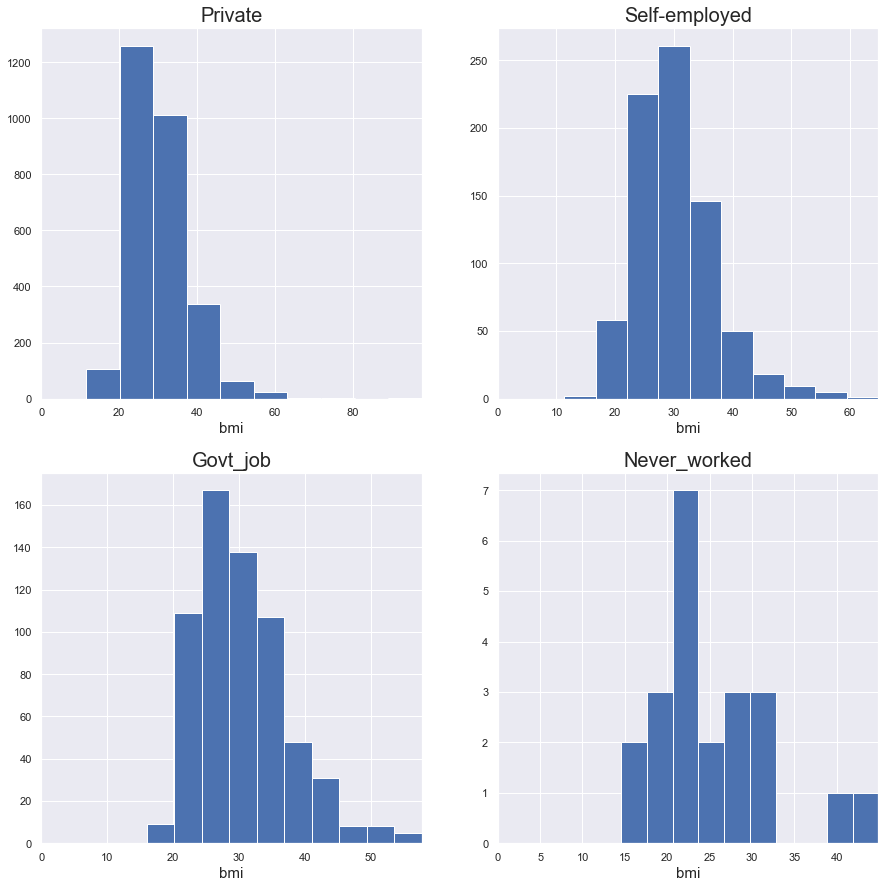

In [52]:
plotlist= [private, self_employed, govt_job, never_worked] # make a list of previously defined dataframes for making a subplot 


fig, ax= plt.subplots(2,2, figsize=(15, 15))    

row=0  # for subplots' row
column= 0  # for subplots' column
for work in plotlist: 
    ax[row, column].hist(work['bmi'])             # histogram  
    
    ax[row, column].set_xlabel('bmi', fontsize= 15)
    ax[row, column ].set_title(work.iloc[0, -1], fontsize= 20)   # setting title
    ax[row, column].set_xlim(0, work['bmi'].max())           # adjusting the range of x-axis 
    
    # counter 
    if column==1: 
        row = 1 
        column=0 
    else: 
        column+=1 


Make a summary table of important measures 

In [53]:
# the mean of each working groups 
counts= private.describe().loc['count', 'bmi'], self_employed.describe().loc['count', 'bmi'], govt_job.describe().loc['count', 'bmi'], never_worked.describe().loc['count', 'bmi']
means= private.describe().loc['mean', 'bmi'], self_employed.describe().loc['mean', 'bmi'], govt_job.describe().loc['mean', 'bmi'], never_worked.describe().loc['mean', 'bmi']
modes=private['bmi'].mode().values[0], self_employed['bmi'].mode().values[0], govt_job['bmi'].mode().values[0], never_worked['bmi'].mode().values[0]
skewnesses= private['bmi'].skew(), self_employed['bmi'].skew(), govt_job['bmi'].skew() , never_worked['bmi'].skew()


summary_table= pd.DataFrame({'count': counts, 'mean': means, 'mode': modes, 'skewness': skewnesses}, index = ['private', 'self-employed', 'government', 'never worked'])



In [54]:
summary_table

,count,mean,mode,skewness
private,2811.0,30.304625,26.7,1.491159
self-employed,775.0,30.211871,29.6,1.024127
government,630.0,30.522063,30.0,0.982266
never worked,22.0,25.545455,22.7,1.174662


In [55]:
private.describe()

,bmi
count,2811.000000
mean,30.304625
std,7.582663
min,11.500000
25%,25.100000
50%,28.900000
75%,34.050000
max,97.600000


In [56]:
self_employed.describe()

,bmi
count,775.000000
mean,30.211871
std,6.687689
min,11.300000
25%,25.800000
50%,29.400000
75%,33.700000
max,64.800000


In [57]:
govt_job.describe()

,bmi
count,630.000000
mean,30.522063
std,6.919375
min,16.000000
25%,25.500000
50%,29.400000
75%,34.375000
max,57.700000


In [58]:
never_worked.describe()

,bmi
count,22.000000
mean,25.545455
std,7.441757
min,14.600000
25%,20.975000
50%,23.150000
75%,28.350000
max,44.900000


Findings: 
1. Private: 
    - highest bmi value across different work types. 
    - more right-skewed than other, but the mean bmi is smaller than other working groups (no counting the never-worked)



## Smoking status vs work type 

In [59]:
# unique values in smoking_status column
data_without_chidren['smoking_status'].unique()


array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

We remove the observations with unknown smoking status: 

In [60]:
data_smokingandwork= data_without_chidren[data_without_chidren['smoking_status'] != 'Unknown'][['smoking_status','work_type' ]]

In [61]:
data_smokingandwork

,smoking_status,work_type
0,formerly smoked,Private
2,never smoked,Private
3,smokes,Private
4,never smoked,Self-employed
5,formerly smoked,Private
...,...,...
5100,never smoked,Self-employed
5102,never smoked,Private
5106,never smoked,Self-employed
5107,never smoked,Self-employed


We reuse the previous code to analyse the relative smoking statuses: 

In [62]:
private= data_smokingandwork[data_smokingandwork['work_type']== 'Private']
self_employed= data_smokingandwork[data_smokingandwork['work_type']== 'Self-employed'] 
govt_job = data_smokingandwork[data_smokingandwork['work_type']=='Govt_job'] 
never_worked= data_smokingandwork[data_smokingandwork['work_type']== 'Never_worked'] 

### Pie plots 

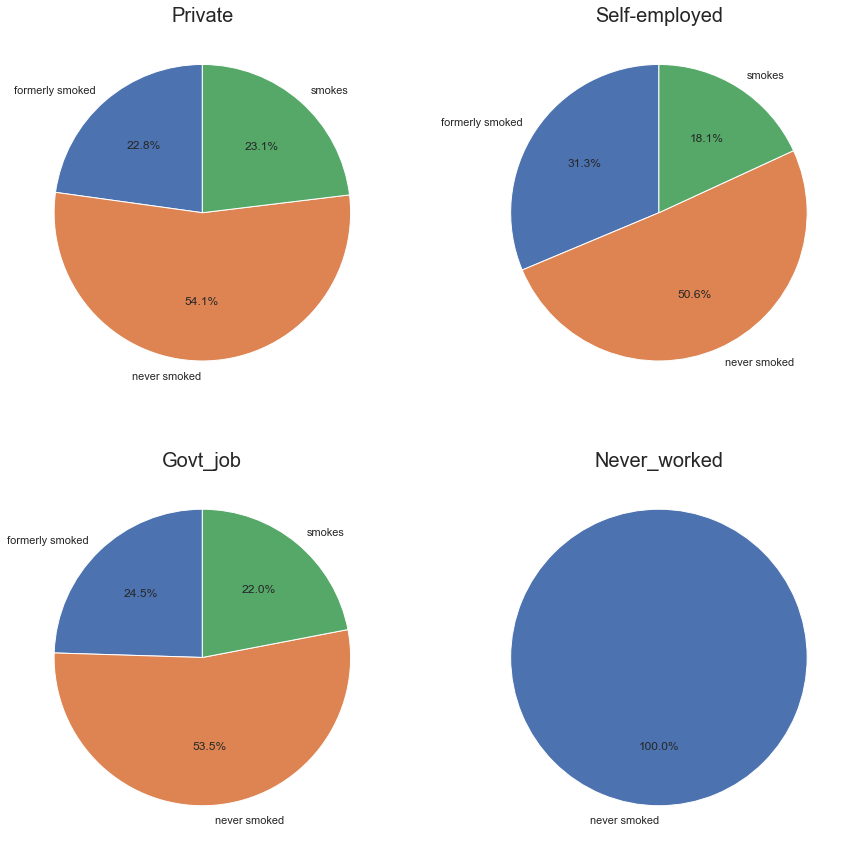

In [63]:
plotlist= [private, self_employed, govt_job, never_worked] # list of dataframes


fig, ax= plt.subplots(2,2, figsize=(15, 15))    

row=0  # for subplots' row
column= 0  # for subplots' column
for work in plotlist: 
    values= work.groupby('smoking_status').count().values.reshape(-1)  #
    labels= work.groupby('smoking_status').count().index.values       
    ax[row, column ].pie(values, labels= labels, startangle=90, autopct='%1.1f%%')
    ax[row, column ].set_title(work.iloc[0, -1], fontsize= 20)
    
    
    if column==1: 
        row = 1 
        column=0 
    else: 
        column+=1 
    
      

Findings: 
- Private and government employees smoke most, proportionally.  
- The self-employed have least never smoked people, but most former smokers: many have quit smoking. 
- The never worked group have never smoked: since most are teen or young adults, it is not a surprise. 



## Stroke vs work type 

We reuse the code used in Heart disease analysis: 

In [64]:
# create table for average stroke for each work types 
stroke_mean = data_without_chidren.groupby(['work_type']).mean().loc[:, 'stroke':'stroke']
stroke_mean

,stroke
work_type,
Govt_job,0.044444
Never_worked,0.000000
Private,0.045180
Self-employed,0.068387


The self-employed are most likely to get stroke. Let's hypothesis test is this result significant. 


Hypotheses: 

$H_0$: $\mu_s-\mu_0\leq 0 $ (mean of stroke of the self-employed is smaller or equal to that of the other work type groups)

$H_1$:  $\mu_s>\mu_0\rightarrow \mu_s-\mu_0>0 $ (mean of stroke of the self-employed is greater than that of the other work type groups)



In [65]:
x_bar= stroke_mean.loc['Self-employed', 'stroke'] # the mean risk of getting stroke of the self-employed
y_bar = stroke_mean                                    # the mean risk of getting stroke of across all work types 

In [66]:
n_x= len(self_empl) # number of observations in self-employed group 
n_y =data_without_chidren.groupby(['work_type']).count()['gender'] # number of observations in all work types 


s_x2= data_without_chidren.groupby(['work_type']).var()['stroke']['Self-employed']    # sample variance of the self-employed 
s_y2= data_without_chidren.groupby(['work_type']).var()['stroke']     # sample variance of all groups 

s_p2= pooled_variance(n_x, n_y, s_x2, s_y2)   # computing pooled variance


In [67]:
T_static= T_statistic_for_two_unknown(x_bar, y_bar.values[: ,-1],n_x, n_y, 0, s_p2.values) # computing t-static 
T_static

work_type
Govt_job         1.916034
Never_worked     1.269215
Private          2.621501
Self-employed    0.000000
Name: gender, dtype: float64

In [68]:
df= n_x+n_y-2 # degrees of freedom



In [69]:
import scipy.stats 

# find p-value 
p_values= scipy.stats.t.sf(T_static, df= df) # p-values 
p_values.round(3) 

array([0.028, 0.102, 0.004, 0.5  ])

In [70]:
p_value_summary= pd.DataFrame( p_values.round(3), index= df.index.values, columns=['p-values']) 
p_value_summary

,p-values
Govt_job,0.028
Never_worked,0.102
Private,0.004
Self-employed,0.500


Findings: 
- The self-employed have significantly greater risk of getting stroke among working groups (not including never-worked) at 0.05 significance level. 

# Average blood glucose vs age in working group (Cluster analysis)

We now need to select the right number of clusters. 

For that we need so called the elbow method: Plotting within-cluster sum of squares (WCSS) against their corresponding number of clusters. 

In [71]:
x= data_without_chidren[['age', 'avg_glucose_level']]    # features used to make cluster analysis 

wcss= []   # for storing WCSS values for each corresponding number of clusters 

for i in range(1, 11): 
    kmeans=KMeans(i)        # make kmean object 
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)    # add WCSS value to the list 

We make plot to determine the right number of clusters to use: 

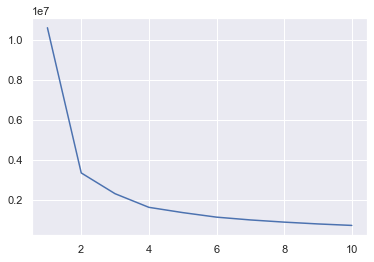

In [72]:
plt.plot(range(1, 11), wcss)

We recognize that 4 is a good clustering number 

### Making the cluster with k= 4


In [73]:
# clustering 
kmeans= KMeans(4)  
kmeans.fit(x) 


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
identified_clusters= kmeans.fit_predict(x) # identified clusters 


In [75]:
# save identified clusters into the features 
data_with_clusters =x.copy( ) # make copy of the original features
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,age,avg_glucose_level,Cluster
0,67.0,228.69,1
2,80.0,105.92,3
3,49.0,171.23,1
4,79.0,174.12,1
5,81.0,186.21,1
...,...,...,...
5103,18.0,82.85,2
5106,81.0,125.20,0
5107,35.0,82.99,2
5108,51.0,166.29,0


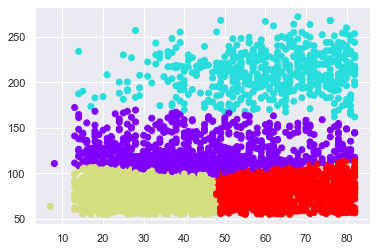

In [76]:
plt.scatter(data_with_clusters['age'], data_with_clusters['avg_glucose_level'], c= data_with_clusters['Cluster'], cmap= 'rainbow')


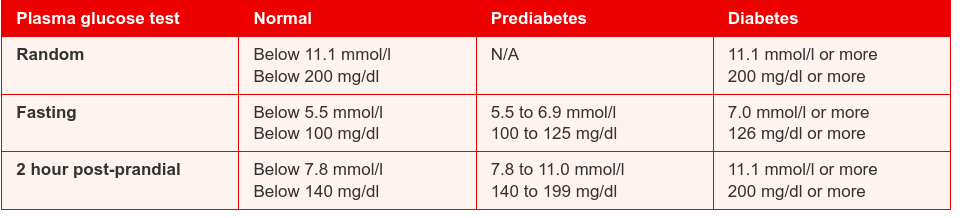

https://www.diabetes.co.uk/diabetes_care/blood-sugar-level-ranges.html


 We recognize four groups from our cluster analysis. We assume data collected were randomly collected, with no requirement for fasting. Most people are healthy, in the normal range of blood glucose (below 200 mg/dl). 
 
In the red cluster (e.g. with high average blood glucose), these people are diabetic and mostly are dominated by old people. 

Discovery: 

1. Among diabetics, most are old people (age range of 50 – 80)

# Cluster analysis of average blood glucose, bmi, work types and age 

### Determining the number of clusters to use 

In [77]:
data.columns.values 

array(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'], dtype=object)

we need to convert column Work types into numerical: 

In [78]:
data_without_chidren['work_type'].unique()      # for mapping in the next section 

array(['Private', 'Self-employed', 'Govt_job', 'Never_worked'],
      dtype=object)

In [79]:
data_work_numeric= data_without_chidren.copy()      # make copy of the data without children 
data_work_numeric['work_type']= data_work_numeric['work_type'].map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'Never_worked':3})  # converting work types into numerical 
data_work_numeric

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,0,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,0,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,0,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,1,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,0,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5103,Female,18.0,0,0,No,0,Urban,82.85,46.9,Unknown,0
5106,Female,81.0,0,0,Yes,1,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,1,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,0,Rural,166.29,25.6,formerly smoked,0


In [80]:
x= data_work_numeric[['age', 'avg_glucose_level', 'bmi',  'work_type', ]]    # features used to make cluster analysis 

wcss= []   # for storing WCSS values for each corresponding number of clusters 

for i in range(1, 11): 
    kmeans=KMeans(i)        # make kmean object 
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)    # add WCSS value to the list 

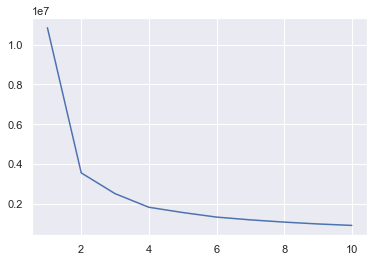

In [81]:
plt.plot(range(1, 11), wcss)

k=2,3 or 4 seem to be good 

### Making the cluster with k = 2,3,4 

In [82]:
# clustering 
kmeans= KMeans(3)  
kmeans.fit(x) 



identified_clusters= kmeans.fit_predict(x) # identified clusters 


# save identified clusters into the features 
data_with_clusters =x.copy( ) # make copy of the original features
data_with_clusters['Cluster'] = identified_clusters


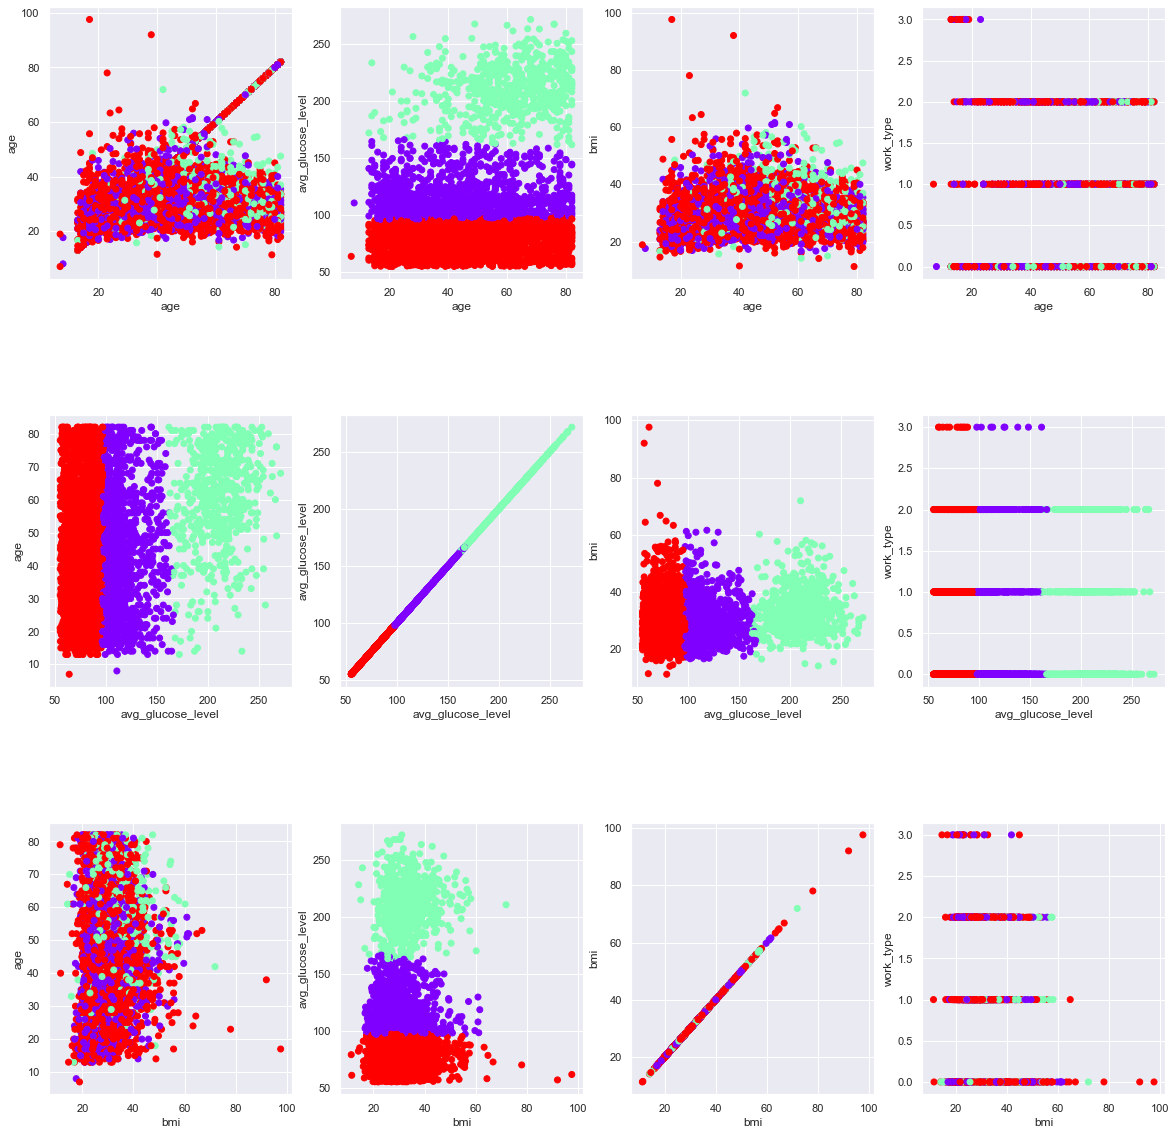

In [83]:
fig, ax = plt.subplots(3,4, figsize= (20,20))

for i in range(0, 3): 
    for j in range(0, 4): 
        ax[i, j ].scatter(data_with_clusters.iloc[:, i], data_with_clusters.iloc[:, j], c= data_with_clusters['Cluster'], cmap= 'rainbow')   # make scatter plot against other variables 
        ax[i,j].set_xlabel(data_with_clusters.iloc[:, i].name)  # setting xlabel
        ax[i,j].set_ylabel(data_with_clusters.iloc[:, j].name) #setting ylabel 
        


plt.subplots_adjust(hspace=0.5)
ax[0,0].scatter(data_with_clusters['age'], data_with_clusters['bmi'], c= data_with_clusters['Cluster'], cmap= 'rainbow')

We find the following results: 

- an employee's average blood glucose level is irrespective of the work type. (see work type and average glucose level figure)
- people with higher than 200 mg/dl blood glucose tend to be older people (as previously discovered)
- there is no relationship between high bmi and high blood glucose level (see BMI and average glucose level)
- there is no age and bmi dependence 
- there is larger range in bmi among private sector workers. 

# Conclusion 